# Tutorial 3: Customizing a crystal

In this tutorial, we show how to customize the domains for a custom crystal so that its PMF approximates a specified target PMF. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from custom_poling.core.target import Target
from custom_poling.core.custom_crystal import CustomCrystal

In [3]:
# Crystal properties
domain_width = 0.01
number_domains = 1000
L = number_domains * domain_width
k0 = np.pi / domain_width

# Numerical integration parameters
dk = 0.1
k_array = np.arange(k0-10,k0+10,dk)

### Sinc PMF

In [4]:
# Create a custom crystal object
custom_crystal_sinc = CustomCrystal(domain_width,number_domains)
domain_middles_sinc = custom_crystal_sinc.domain_middles

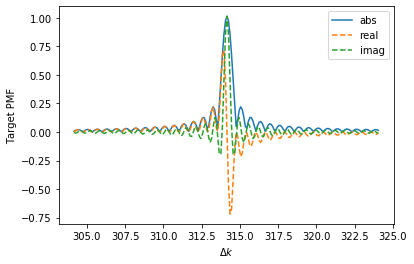

In [5]:
#Define and plot the target function
target_pmf_sinc = lambda k:(1j*2/(np.pi**2)) * np.sin((k-k0) * L/2)*np.exp(1j * L/2 * (k-k0))/(k-k0)
target_sinc = Target(target_pmf_sinc,k_array)
target_sinc.plot_pmf()

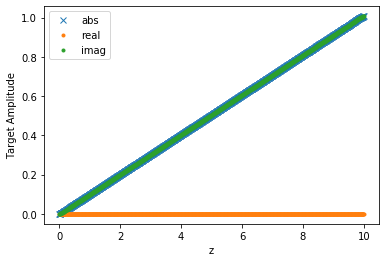

In [6]:
# Compute and plot the target amplitude
target_amplitude_sinc = target_sinc.compute_amplitude(k0,domain_middles_sinc)
target_sinc.plot_amplitude()

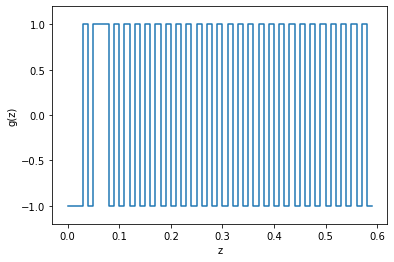

In [7]:
# Compute and plot the custom domains
custom_domains_sinc = custom_crystal_sinc.compute_domains(target_amplitude_sinc,k0)
custom_crystal_sinc.plot_domains(n_max=60)

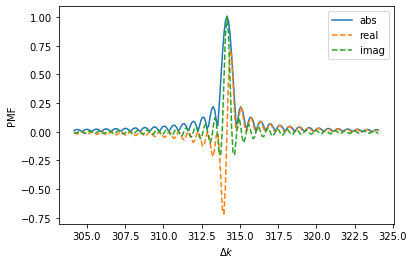

In [8]:
# Compute and plot the PMF for the cystomized crystal

custom_crystal_sinc.compute_pmf(k_array)
custom_crystal_sinc.plot_pmf()

### Gaussian PMF

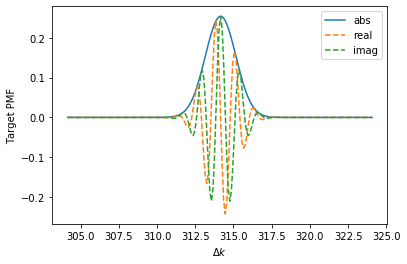

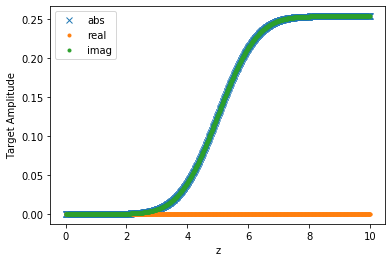

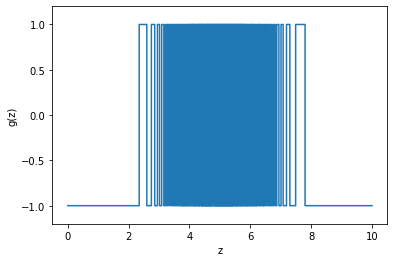

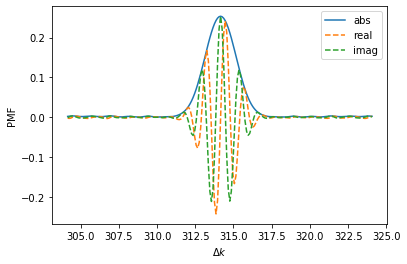

In [9]:
# Create a custom crystal object
custom_crystal_gauss = CustomCrystal(domain_width,number_domains)
domain_middles_gauss = custom_crystal_gauss.domain_middles

#Define and plot the target function
std = L/10.
target_pmf_gauss = lambda k:1j*std*np.sqrt(2)/(np.pi*np.sqrt(np.pi))*np.exp(-(k-k0)**2/(2*std**2))*np.exp(1j * L/2 * k)
target_gauss = Target(target_pmf_gauss,k_array)
target_gauss.plot_pmf()

# Compute and plot the target amplitude
target_amplitude_gauss = target_gauss.compute_amplitude(k0,domain_middles_gauss)
target_gauss.plot_amplitude()

# Compute and plot the custom domains
custom_domains_gauss = custom_crystal_gauss.compute_domains(target_amplitude_gauss,k0)
custom_crystal_gauss.plot_domains()

# Compute and plot the PMF for the cystomized crystal

custom_crystal_gauss.compute_pmf(k_array)
custom_crystal_gauss.plot_pmf()